# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrEu-2019-02-19.zip
unzip autoriaNumberplateOcrEu-2019-02-19.zip
mv autoriaNumberplateOcrEu-2019-02-19 eu
```
or use your own dataset.
<p style="border:1px solid gray; padding: 0px 4px; color:#a77;"><b>Accuracy increase hint:</b> <i>Add to train ukrainian dataset from autoriaNumberplateOcrUa-2020-07-14.zip</i></p>


In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "eu"
VERSION = "2020_08_26_tensorflow_v2"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [5]:
class eu(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M", "O", "P", "T", "X"]
        
        self.EPOCHS = 1

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 8
Letters train  {'X', 'J', '9', '2', 'B', '3', '8', 'Z', 'E', 'W', 'I', 'T', 'P', 'C', 'U', 'G', '6', '7', '5', 'Q', '1', 'D', 'S', '4', 'L', 'M', 'H', 'V', 'N', '0', 'Y', 'A', 'R', 'F', 'K', 'O'}
Letters val  {'J', 'X', '9', '2', 'B', '3', '8', 'Z', 'E', 'W', 'I', 'T', 'P', 'C', 'U', 'G', '6', '7', '5', 'Q', '1', 'D', 'S', '4', 'L', 'M', 'H', 'V', 'N', '0', 'Y', 'R', 'A', 'F', 'K', 'O'}
Letters test  {'X', 'J', '9', '2', 'B', '3', '8', 'Z', 'E', 'W', 'I', 'T', 'P', 'C', 'U', 'G', '6', '7', '5', 'Q', '1', 'D', 'S', '4', 'L', 'M', 'H', 'V', 'N', '0', 'Y', 'R', 'A', 'F', 'K', 'O'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


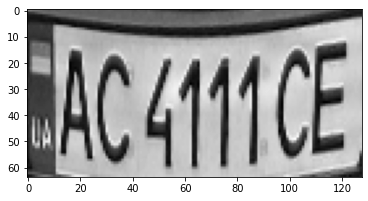

2) the_labels (plate number): AC4111CE is encoded as [10, 12, 4, 1, 1, 1, 12, 14, 37]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED


In [6]:
ocrTextDetector = eu()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=0)

In [7]:
model = ocrTextDetector.train(is_random=1)


START TRAINING
Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
_______________________________________________________________________

In [8]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 04624
True: 			 SL04624

Predicted: 		 DV987HC
True: 			 DY987HR

Predicted: 		 DW143G
True: 			 DW143EG

Predicted: 		 NJ735
True: 			 HUB735

Predicted: 		 40727XA
True: 			 40727XM

Predicted: 		 RT258FT
True: 			 RT258T

Predicted: 		 ES5087
True: 			 ES508ZW

Predicted: 		 DA03012
True: 			 DA030121

Predicted: 		 B807Z
True: 			 9807NZ

Predicted: 		 51316KB
True: 			 51316K

Predicted: 		 LZA59592
True: 			 LZA59596

Predicted: 		 DA401
True: 			 DA401U

Predicted: 		 YP0YNU
True: 			 YP06YNU

Predicted: 		 WPN62E
True: 			 WPN62YE

Predicted: 		 LU735FF
True: 			 LU735EF

Predicted: 		 P04754
True: 			 P04759

Predicted: 		 DC6858H
True: 			 DC685BH

Predicted: 		 P1329CC
True: 			 BP1329CC

Predicted: 		 EC777RV
True: 			 EC777RN

Predicted: 		 RPR2143
True: 			 RPR21476

Predicted: 		 DA401
True: 			 DA401U

Predicted: 		 56895P
True: 			 56886PB

Predicted: 		 CV805
True: 			 CV805NA

Predicted: 		 23478CI
True: 			 23478CA

Predicted: 		 IL1055
True

In [9]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_eu_2020_08_26_tensorflow_v2.h5


GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 8
Letters train  {'J', 'X', '9', '2', 'B', '3', '8', 'Z', 'E', 'W', 'I', 'T', 'P', 'C', 'U', 'G', '6', '7', '5', 'Q', '1', 'D', 'S', '4', 'L', 'M', 'H', 'V', 'N', '0', 'Y', 'A', 'R', 'F', 'K', 'O'}
Letters val  {'J', 'X', '9', '2', 'B', '3', '8', 'Z', 'E', 'W', 'I', 'T', 'P', 'C', 'U', 'G', '6', '7', '5', 'Q', '1', 'D', 'S', '4', 'L', 'M', 'H', 'V', 'N', '0', 'Y', 'R', 'A', 'F', 'K', 'O'}
Letters test  {'X', 'J', '9', '2', 'B', '3', '8', 'Z', 'E', 'W', 'I', 'T', 'P', 'C', 'U', 'G', '6', '7', '5', 'Q', '1', 'D', 'S', '4', 'L', 'M', 'H', 'V', 'N', '0', 'Y', 'R', 'A', 'F', 'K', 'O'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


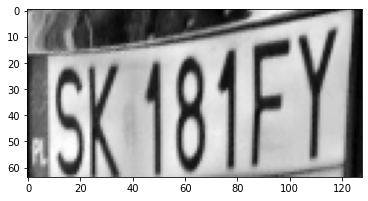

2) the_labels (plate number): SK181FY is encoded as [28, 20, 1, 8, 1, 15, 34, 37, 37]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "functional_105"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_____________________

In [45]:
# Train with aug
ocrTextDetector = eu()
ocrTextDetector.EPOCHS = 3

model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

model = ocrTextDetector.train(load_last_weights=True)

In [46]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 CS118CF
True: 			 CS118CY

Predicted: 		 L04624
True: 			 SL04624

Predicted: 		 DY987HS
True: 			 DY987HR

Predicted: 		 NJB735
True: 			 HUB735

Predicted: 		 WT258T
True: 			 RT258T

Predicted: 		 9B07NZ
True: 			 9807NZ

Predicted: 		 51316KC
True: 			 51316K

Predicted: 		 535XSK
True: 			 53SXSK

Predicted: 		 YPQ6YNU
True: 			 YP06YNU

Predicted: 		 WPN62E
True: 			 WPN62YE

Predicted: 		 EC777RNL
True: 			 EC777RN

Predicted: 		 RPR2143
True: 			 RPR21476

Predicted: 		 56896PB
True: 			 56886PB

Predicted: 		 CV805WA
True: 			 CV805NA

Predicted: 		 GUR6355
True: 			 GUR635

Predicted: 		 56639AA
True: 			 58639AA

Predicted: 		 PG6715E
True: 			 PGN671FE

Predicted: 		 3699BB
True: 			 36939BB

Predicted: 		 TG27060
True: 			 TG270609

Predicted: 		 16936CH
True: 			 16986CH

Predicted: 		 18567KX
True: 			 78567KX

Predicted: 		 AUR75QQ
True: 			 AUR75Q

Predicted: 		 BJ467
True: 			 BJ467E

Predicted: 		 78567XX
True: 			 78567KX

Predicted: 		 CH26

In [47]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_eu_2020_08_26_tensorflow_v2.h5


In [34]:
ocrTextDetector.MODEL.load_model(RESULT_MODEL_PATH)